<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#base-research" data-toc-modified-id="base-research-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>base research</a></span></li><li><span><a href="#initial-train" data-toc-modified-id="initial-train-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>initial train</a></span></li></ul></div>

In [47]:
import gym

import numpy as np

from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

%matplotlib inline

# base research

In [2]:
env = gym.make('CartPole-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [12]:
env.action_space

Discrete(2)

In [13]:
[env.action_space.sample() for _ in range(10)]

[1, 1, 1, 1, 0, 0, 1, 0, 1, 1]

In [21]:
state = env.reset()

for i in range(200):
    state, reward, done, _ = env.step(env.action_space.sample())
    if reward == 0 or done:
        break
    print(reward, state, done)

1.0 [-0.01345072  0.20017473  0.03470455 -0.3188607 ] False
1.0 [-0.00944722  0.00457613  0.02832733 -0.01543839] False
1.0 [-0.0093557   0.19928063  0.02801856 -0.29905083] False
1.0 [-0.00537009  0.00377073  0.02203755  0.00233529] False
1.0 [-0.00529467 -0.19166023  0.02208425  0.30188905] False
1.0 [-0.00912788  0.00314012  0.02812203  0.01625203] False
1.0 [-0.00906507 -0.19237361  0.02844707  0.31767346] False
1.0 [-0.01291255 -0.38788894  0.03480054  0.61919011] False
1.0 [-0.02067033 -0.58347924  0.04718435  0.92262721] False
1.0 [-0.03233991 -0.38902546  0.06563689  0.64513823] False
1.0 [-0.04012042 -0.19487662  0.07853965  0.37382546] False
1.0 [-0.04401795 -0.39102127  0.08601616  0.69020239] False
1.0 [-0.05183838 -0.58722486  0.09982021  1.00867727] False
1.0 [-0.06358287 -0.78352733  0.11999376  1.33096364] False
1.0 [-0.07925342 -0.59010571  0.14661303  1.07811101] False
1.0 [-0.09105554 -0.78682744  0.16817525  1.41297781] False
1.0 [-0.10679208 -0.98358666  0.19643481

# initial train

In [44]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(4, )))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
EPOCHS = 1000
GAMES = 10
ITERATIONS = 200

epoch_rewards = []
for epoch_no in range(EPOCHS):
    
#     print('epoch', epoch_no)
    
    X_epoch = []
    Y_epoch = []
    
    game_rewards = []
    for game_no in range(GAMES):
        
        state = env.reset()
        
        game_states = []
        game_actions = []
        
        for iter_no in range(ITERATIONS):
            
            game_states.append(state)
            
            action_predict = model.predict(np.array([state]))
            action = int(action_predict[0][0] > 0.5)
            
            game_actions.append(action)

            state, reward, done, _ = env.step(action)
            
            game_rewards.append(reward)
            
            if reward == 0 or done:
                break
        
        X_epoch += game_states
        if reward == 0:
            # fix actions
            game_actions = [1 - action for action in game_actions]
        Y_epoch += game_actions
    
    X_epoch = np.array(X_epoch)
    Y_epoch = np.array(Y_epoch)
    
    epoch_rewards.append(sum(game_rewards))
    if epoch_no % 10 == 0:
        print('epoch reward', epoch_no, sum(game_rewards))
    
    model.train_on_batch(X_epoch, Y_epoch)

epoch reward 0 1957.0
epoch reward 10 1806.0
epoch reward 20 1706.0
epoch reward 30 1709.0
epoch reward 40 1792.0
epoch reward 50 1832.0
epoch reward 60 1869.0
epoch reward 70 1920.0
epoch reward 80 1899.0
epoch reward 90 1826.0


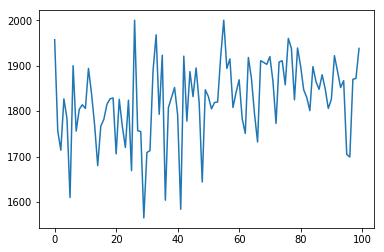

In [48]:
plt.plot(epoch_rewards)